# Simple Linear Regression with Synthetic Data

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

### below is code that defines:
 - `build_model(my_learning_rate)`, which builds an empty model.
 - `train_model(model, feature, label, epochs)`, which trains the model

this code will be expressed upon later

In [4]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


### below is code that defines:
 - `plot_the_model(trained_weight, trained_bias, feature, label)`, plots feature values vs. the label values
 - `plot_the_loss_curve(epochs, rmse)`, plots the loss curve

this code will be expressed upon later

In [7]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


### Define the dataset

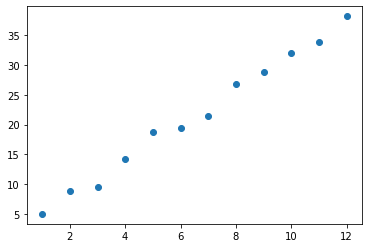

In [13]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
plt.scatter(my_feature, my_label)

### Specifiy the hyperparameters

Epoch 1/10
1/1 [==============================] - 0s 978us/step - loss: 589.1340 - root_mean_squared_error: 24.2721
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 576.5386 - root_mean_squared_error: 24.0112
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 567.5327 - root_mean_squared_error: 23.8229
Epoch 4/10
1/1 [==============================] - 0s 497us/step - loss: 560.0698 - root_mean_squared_error: 23.6658
Epoch 5/10
1/1 [==============================] - 0s 992us/step - loss: 553.5015 - root_mean_squared_error: 23.5266
Epoch 6/10
1/1 [==============================] - 0s 500us/step - loss: 547.5281 - root_mean_squared_error: 23.3993
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 541.9822 - root_mean_squared_error: 23.2805
Epoch 8/10
1/1 [==============================] - 0s 993us/step - loss: 536.7601 - root_mean_squared_error: 23.1681
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 531.7923

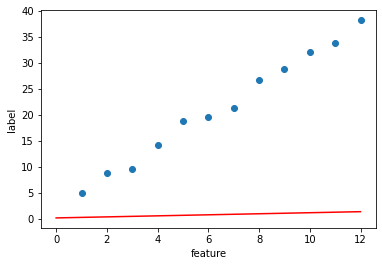



does our loss flatten out meaning converge?



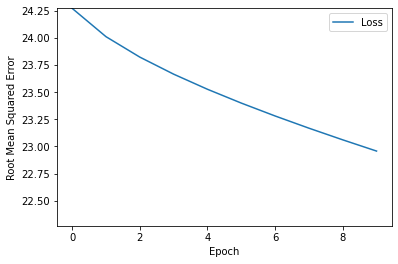

In [16]:
# hyperparamters
learning_rate=0.01
epochs=10
my_batch_size=12

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### increase the number of epochs

lets try and increase the number of epochs to allow for more iterations

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 562.9433 - root_mean_squared_error: 23.7264
Epoch 2/100
1/1 [==============================] - 0s 973us/step - loss: 550.6330 - root_mean_squared_error: 23.4656
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 541.8338 - root_mean_squared_error: 23.2773
Epoch 4/100
1/1 [==============================] - 0s 992us/step - loss: 534.5438 - root_mean_squared_error: 23.1202
Epoch 5/100
1/1 [==============================] - 0s 992us/step - loss: 528.1292 - root_mean_squared_error: 22.9811
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 522.2966 - root_mean_squared_error: 22.8538
Epoch 7/100
1/1 [==============================] - 0s 991us/step - loss: 516.8823 - root_mean_squared_error: 22.7350
Epoch 8/100
1/1 [==============================] - 0s 992us/step - loss: 511.7848 - root_mean_squared_error: 22.6227
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 304.9370 - root_mean_squared_error: 17.4624
Epoch 71/100
1/1 [==============================] - 0s 993us/step - loss: 302.1790 - root_mean_squared_error: 17.3833
Epoch 72/100
1/1 [==============================] - 0s 992us/step - loss: 299.4342 - root_mean_squared_error: 17.3042
Epoch 73/100
1/1 [==============================] - 0s 498us/step - loss: 296.7025 - root_mean_squared_error: 17.2251
Epoch 74/100
1/1 [==============================] - 0s 993us/step - loss: 293.9839 - root_mean_squared_error: 17.1460
Epoch 75/100
1/1 [==============================] - 0s 993us/step - loss: 291.2785 - root_mean_squared_error: 17.0669
Epoch 76/100
1/1 [==============================] - 0s 993us/step - loss: 288.5862 - root_mean_squared_error: 16.9878
Epoch 77/100
1/1 [==============================] - 0s 498us/step - loss: 285.9070 - root_mean_squared_error: 16.9088
Epoch 78/100
1/1 [==============================] - 0s 496us/step - los

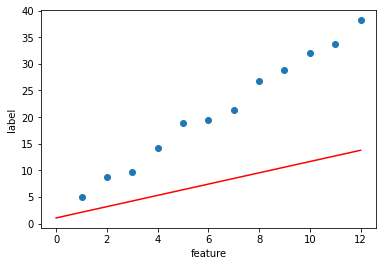



does our loss flatten out meaning converge?



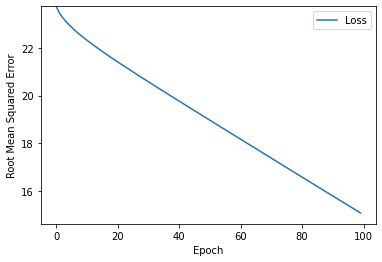

In [18]:
# hyperparamters
learning_rate=0.01
epochs=100
my_batch_size=12

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### increase the learning rate to 1

let's incrase the learning rate to allow for faster learning

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 1130.2909 - root_mean_squared_error: 33.6198
Epoch 2/100
1/1 [==============================] - 0s 996us/step - loss: 57.7075 - root_mean_squared_error: 7.5965
Epoch 3/100
1/1 [==============================] - 0s 994us/step - loss: 3.9378 - root_mean_squared_error: 1.9844
Epoch 4/100
1/1 [==============================] - 0s 991us/step - loss: 1.6658 - root_mean_squared_error: 1.2906
Epoch 5/100
1/1 [==============================] - 0s 986us/step - loss: 1.5735 - root_mean_squared_error: 1.2544
Epoch 6/100
1/1 [==============================] - 0s 991us/step - loss: 1.5386 - root_mean_squared_error: 1.2404
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 1.5045 - root_mean_squared_error: 1.2266
Epoch 8/100
1/1 [==============================] - 0s 992us/step - loss: 1.4703 - root_mean_squared_error: 1.2126
Epoch 9/100
1/1 [==============================] - 0s 990us/step - loss: 1.4363 - root_

1/1 [==============================] - 0s 991us/step - loss: 24.6270 - root_mean_squared_error: 4.9626
Epoch 72/100
1/1 [==============================] - 0s 989us/step - loss: 33.3297 - root_mean_squared_error: 5.7732
Epoch 73/100
1/1 [==============================] - 0s 993us/step - loss: 36.3722 - root_mean_squared_error: 6.0309
Epoch 74/100
1/1 [==============================] - 0s 992us/step - loss: 31.9006 - root_mean_squared_error: 5.6481
Epoch 75/100
1/1 [==============================] - 0s 993us/step - loss: 24.3684 - root_mean_squared_error: 4.9364
Epoch 76/100
1/1 [==============================] - 0s 1ms/step - loss: 17.8998 - root_mean_squared_error: 4.2308
Epoch 77/100
1/1 [==============================] - 0s 1ms/step - loss: 13.6060 - root_mean_squared_error: 3.6886
Epoch 78/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1488 - root_mean_squared_error: 3.3390
Epoch 79/100
1/1 [==============================] - 0s 993us/step - loss: 10.0155 - root_me

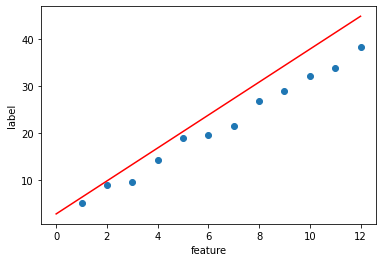



does our loss flatten out meaning converge?



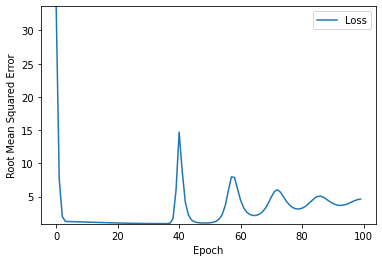

In [20]:
# hyperparamters
learning_rate=1
epochs=100
my_batch_size=12

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### learning rate too high as RMSE increases. 

let's decrease learning rate to 0.1

Epoch 1/100
1/1 [==============================] - 0s 992us/step - loss: 342.3401 - root_mean_squared_error: 18.5024
Epoch 2/100
1/1 [==============================] - 0s 991us/step - loss: 252.6654 - root_mean_squared_error: 15.8955
Epoch 3/100
1/1 [==============================] - 0s 993us/step - loss: 200.1312 - root_mean_squared_error: 14.1468
Epoch 4/100
1/1 [==============================] - 0s 991us/step - loss: 162.8078 - root_mean_squared_error: 12.7596
Epoch 5/100
1/1 [==============================] - 0s 498us/step - loss: 134.1923 - root_mean_squared_error: 11.5841
Epoch 6/100
1/1 [==============================] - 0s 992us/step - loss: 111.3587 - root_mean_squared_error: 10.5527
Epoch 7/100
1/1 [==============================] - 0s 992us/step - loss: 92.7032 - root_mean_squared_error: 9.6282
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 77.2353 - root_mean_squared_error: 8.7884
Epoch 9/100
1/1 [==============================] - 0s 992us/step - los

1/1 [==============================] - 0s 992us/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 73/100
1/1 [==============================] - 0s 994us/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 74/100
1/1 [==============================] - 0s 992us/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 75/100
1/1 [==============================] - 0s 1ms/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 76/100
1/1 [==============================] - 0s 1ms/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 77/100
1/1 [==============================] - 0s 993us/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 78/100
1/1 [==============================] - 0s 992us/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 79/100
1/1 [==============================] - 0s 992us/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 80/100
1/1 [==============================] - 0s 1ms/step - loss: 0.8752 - root_mean_square

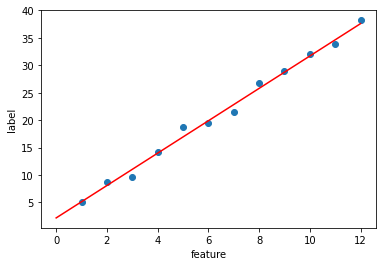



does our loss flatten out meaning converge?



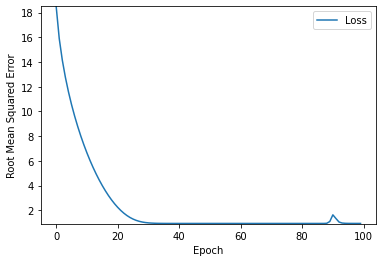

In [21]:
# hyperparamters
learning_rate=0.1
epochs=100
my_batch_size=12

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### let's decrase the batch size 

- we're not overfitting to the whole data set
- and for faster learning

Epoch 1/40
6/6 [==============================] - 0s 1ms/step - loss: 84.9276 - root_mean_squared_error: 9.2156
Epoch 2/40
6/6 [==============================] - 0s 1ms/step - loss: 16.4585 - root_mean_squared_error: 4.0569
Epoch 3/40
6/6 [==============================] - 0s 1ms/step - loss: 3.5190 - root_mean_squared_error: 1.8759
Epoch 4/40
6/6 [==============================] - 0s 1ms/step - loss: 1.2835 - root_mean_squared_error: 1.1329
Epoch 5/40
6/6 [==============================] - 0s 1ms/step - loss: 0.9903 - root_mean_squared_error: 0.9951
Epoch 6/40
6/6 [==============================] - 0s 1ms/step - loss: 1.1473 - root_mean_squared_error: 1.0711
Epoch 7/40
6/6 [==============================] - 0s 996us/step - loss: 1.1472 - root_mean_squared_error: 1.0711
Epoch 8/40
6/6 [==============================] - 0s 992us/step - loss: 1.3428 - root_mean_squared_error: 1.1588
Epoch 9/40
6/6 [==============================] - 0s 992us/step - loss: 1.0496 - root_mean_squared_error: 

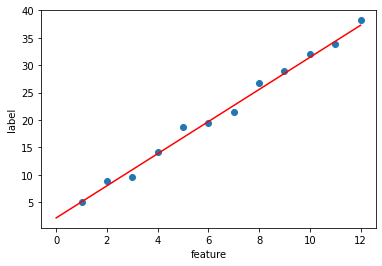



does our loss flatten out meaning converge?



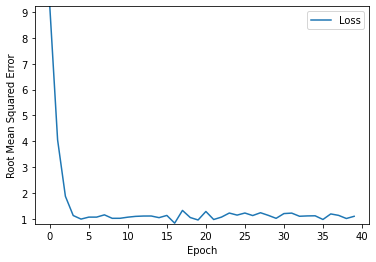

In [24]:
# hyperparamters
learning_rate=0.1
epochs=40
my_batch_size=2

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

- Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
- If the training loss does not converge, train for more epochs.
- If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
- If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
- Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
- Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
- For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

# Linear Regression with a Real Dataset